# <span align="center">Quantifying The World Case Study Unit 4 - Cherry Blossom Race</span>
### <span align="right">Ryan Bass and Brett Benefield </span>
### <span align="right">January 31, 2019</span>

Q.10 We have seen that the 1999 runners were typically older than the 2012 runners. Compare the age distribution of the runners across all 14 years of the races. Use quantile-quantile plots, boxplots, and density curves to make your comparisons. How do the distributions change over the years? Was it a gradual change?

Write a report on your analysis, including introduction, background, methods, results, and conclusions/discussions. Note that the focus of this study is getting the data into the correct format. The analysis section is going to be relatively simple from a statistical standpoint, graphics, descriptive statistics, etc., to answer the question from the problem that you chose.

## Introduction
The Cherry Blossom Ten Mile Run is an annual race held in Washtington D.C. in April when cherry trees are in bloom. Like many other races across the country the results are posted online. The runners information is posted to their website and include their name, sex, hometown, and final time. This yearly data can be scraped from their website to analyze relationships from year to year. The format of the data varies from year to year making scraping more complicated. After our data was successfully scraped and cleaned our analysis will focus on the men's records from the 1999 to 2012 races. Original analysis on this data was performed by Daniel Kaplan and Deborah Nolan in the Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving that focused on how men's ages effected their 10 mile run time. However, we will be analyzing the average age of the particpants throughout the years. It is already known that the average age of the runners has decreased since 1999, but we will provide statistical analysis on how the age distrubtion has changed over all 14 years of data.

## Methods
### Acquiring and Processing of Data
In the initial study performed by the authors, it was evident that preprocessing of the data was necessary to get it into a form that could be used for analysis. Each year's results were hosted on a separate page for year and sex which had to be retrieved individually. Each page had a similar format on how the information was encoded. Using regular expressions, the authors were able to determine the location of each column of data and parse each record. Any header or footer information was ignored, and blank lines were removed from the results. The time results were recorded differently for different years which required determining which column contained the total time to complete the race and then converting that value into the number of minutes taken to complete the race. Finally, each column was encoded as the proper data type, such as numeric or string.

Our interest relied only on the age of the male race participants, but to allow for future analysis to be done more easily all attributes were cleaned as much as possible. A search was done to identify any records where an age was not assigned. Using information from previous years, we compared names, hometown, and race time to determine if these records reflected the same person. Using this method, we were able to assign ages to nine records that were previously encoded as NA (Not Available or Not a Number). The equivalent of no data. The remaining fifteen records without an age were removed from the analysis. The dataset contains over 70,000 records so any statistical analysis performed on the data would not be impacted by removal of 0.2% of the records. Lastly, we looked for any run times that were extreme outliers. A race time of 1.5 minutes was identified. After inspection of the original results, it was determined that this person completed the race in 90 minutes. We felt the max time of 175 minutes for a 64-year-old male was plausible and remained in the dataset.

During our data exploration, we identified records that could belong to the same person but due to a typo in their name they were considered separate people in a given year. Since our analysis was looking at the difference in age over all years this would not impact our results. Any future studies examining individual results over the years should take note and determine the impact this might have on the study.

### Exploratory Data Analysis
Now that we had a complete dataframe we performed exploratory data analysis on the age of the runners. First, to be able to statistically compare different racing years of runner's ages we had to check for the needed assumptions for our statistical test, the two sample t-test. For our test to be accurate our data per year must be normally distributed and the observations must be independent of one another. The independence assumption would be in question since people who race will likely be racing with people they know, likely causing more people of similar age to run together. However, we will continue our analysis with caution. Equal variances is an assumption that can be violated when using Welch's two sample t-test even though the power of this test is virtually identical as a two sample t-test. Because of this we will not assume equal variance and use Welch's two-sample t-test as our test of choice.

Before we visualize any data we can look at some summary statistics of the data.

In [22]:
cbMen.table[,list(n=length(age), Mode=mode(age), Median=median(age, na.rm=TRUE), Mean=mean(age, na.rm=TRUE), SD=sd(age, na.rm=TRUE)), by=year]

year,n,Mode,Median,Mean,SD
1999,3189,39,40,40.33772,10.27030
2000,3016,38,40,40.40782,10.51276
2001,3560,32,39,40.30646,10.59148
2002,3721,32,39,40.30484,10.67330
2003,3944,33,39,40.36562,10.73742
2004,4156,33,38,39.31280,10.94539
2005,4317,35,38,39.56140,11.05185
2006,5234,35,38,38.90715,10.94846
2007,5250,30,37,38.50762,11.14555
2008,5905,27,36,37.78357,10.90176


There is a clear trend of the runners mean age being younger each year while the standard deviation of the age range per year stays relatively constant. We can also see the increase in racers over the years with the race only getting bigger every year and more than doubling from 3189 to 7192 racers in these 14 years.

To begin checking our assumptions for t-tests we'll first check for normally distributed data. We plotted the overall age distrubtion by combining every year's data, and looked at each year individually as well. Kernel Density Estimates were be used to normalize the data from year to year since the amount of runners has increased every year. Histograms were also be plotted to see raw counts as well.

Warning message:
"Removed 4 rows containing non-finite values (stat_density)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 4 rows containing non-finite values (stat_bin)."

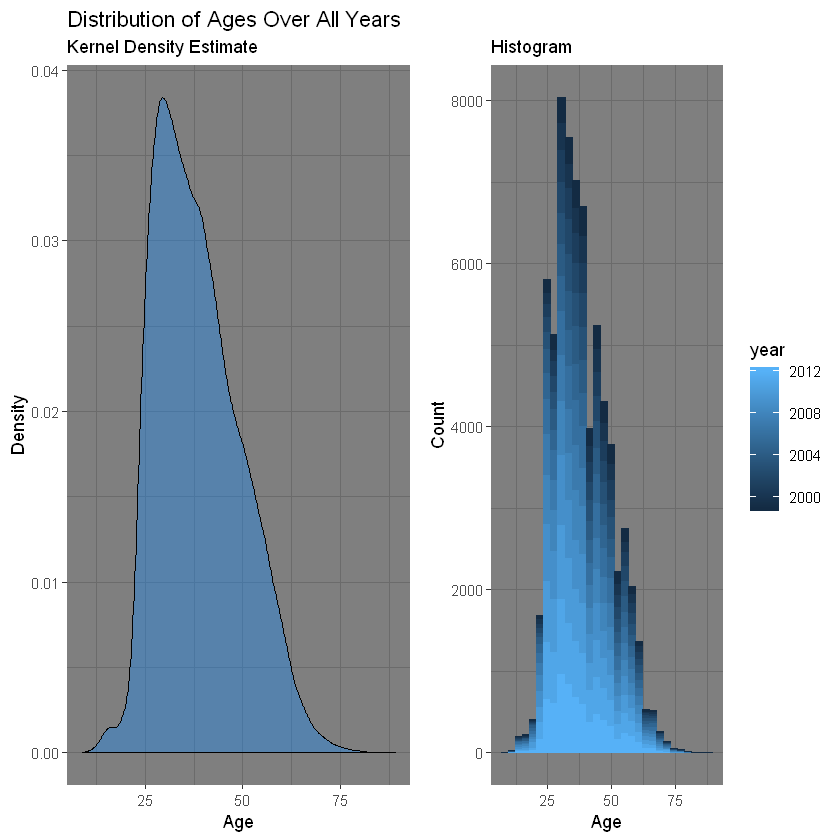

In [26]:
grid.arrange(kde.plot, histo.plot, nrow=1)

Figure 1.0: Distribution of age of runners for counts and density. The mode runner looks to be in their late 20's or early 30's while the average will be higher due to the right skewed distribution.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 4 rows containing non-finite values (stat_bin)."

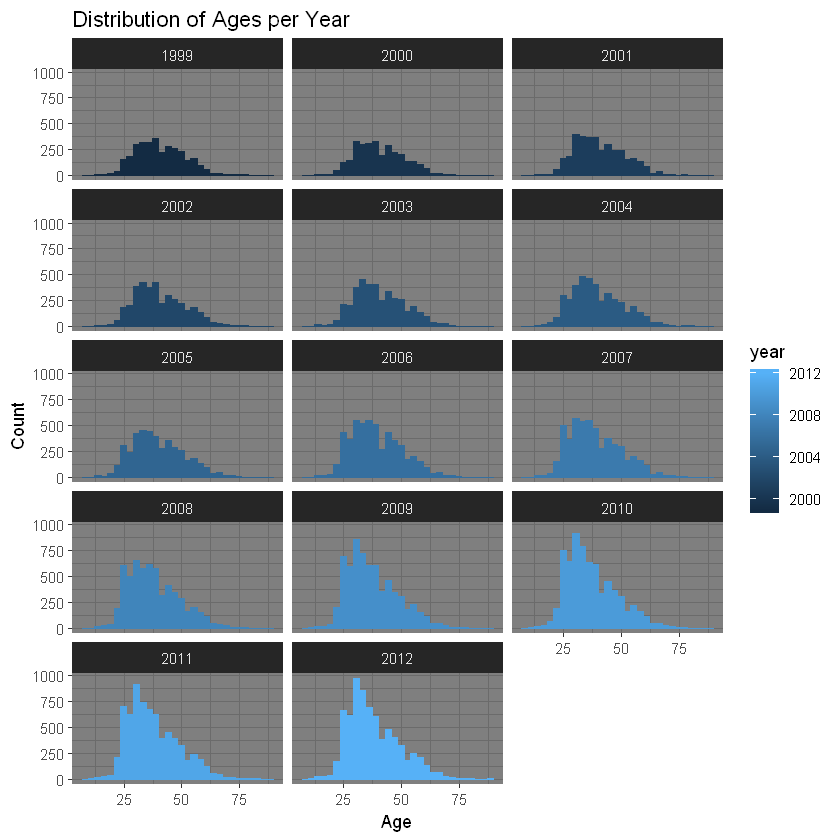

In [28]:
ggplot(data=cbMen, aes(x=age, colour=year, fill=year, group=year)) + 
  geom_histogram() +
  theme_dark() +
  facet_wrap(~ year, ncol=3) + 
  labs(title="Distribution of Ages per Year", x="Age", y="Count")

Figure 1.1: Distribution of ages per year. The mode runner's age can be seen to shift from 39 years old in 1999 to 29 years old in 2012. Also of note is total number of particpants per year increasing. These observations show the influx of new runners being almost only around the age of 28 years old +/- approximately 3 years.

Warning message:
"Removed 4 rows containing non-finite values (stat_density)."

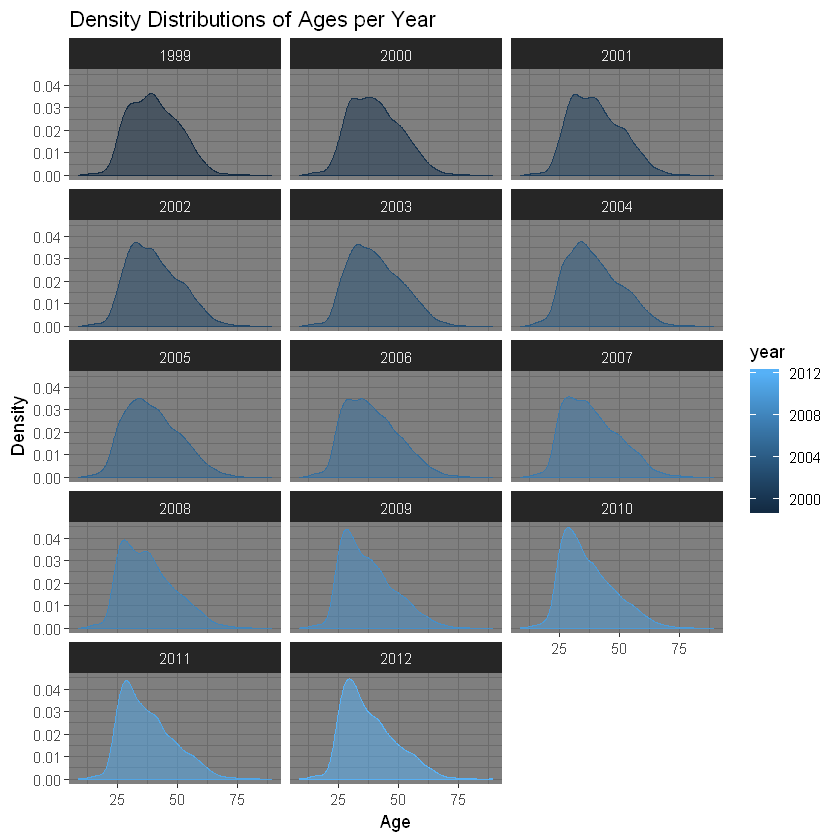

In [45]:
ggplot(data=cbMen, aes(age, group=year, fill=year, colour=year)) +
  geom_density(alpha = 0.5) +
  theme_dark() + 
  facet_wrap(~year, ncol=3) +
  labs(title="Density Distributions of Ages per Year", x="Age", y="Density")

Figure 1.2: Density distribution of ages per year. Like with the raw counts on Figure 1.1, the density distrubtion shows a slow shift in the age population from normally distributed with a median of 40 years old in 1999 to a right skewed population with a median of 35 years old in 2012.

Another way of checking for normality is a Quantile-Quantile plot, or QQ-plot. QQ-plots break up our dataset into quantiles and compare it to normally distrubted quantiles. Therefore, a perfect normally distributed data set will form a straight line in a QQ-plot.

Warning message:
"Removed 4 rows containing non-finite values (stat_qq)."Warning message:
"Removed 4 rows containing non-finite values (stat_qq_line)."

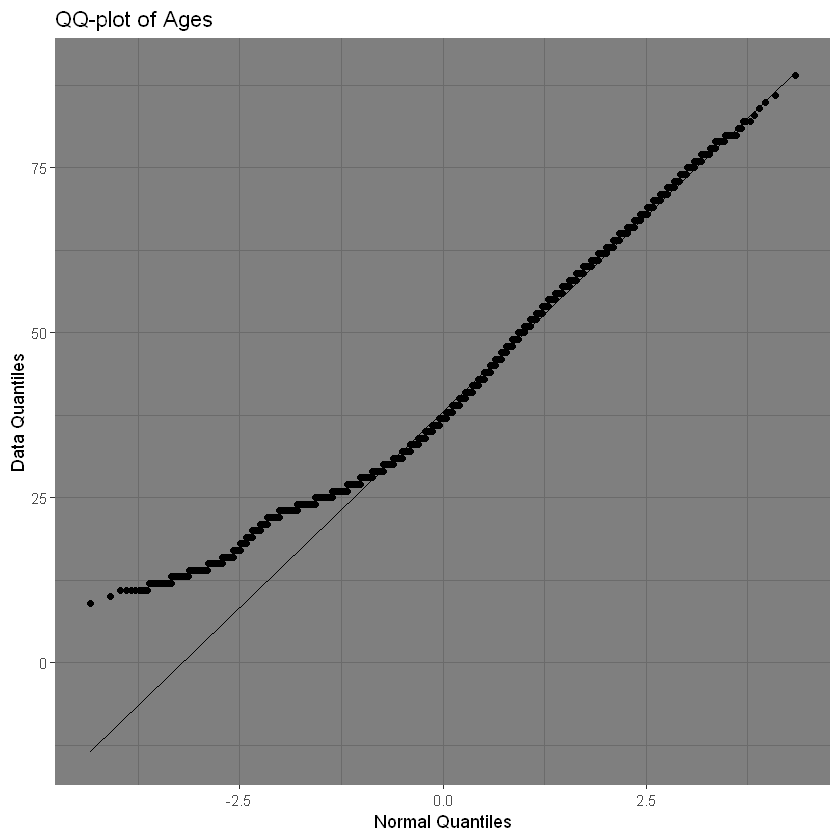

In [29]:
ggplot(data=cbMen, aes(sample=age)) + 
  stat_qq() + 
  stat_qq_line() + 
  theme_dark() +
  labs(title="QQ-plot of Ages Over All Years", x="Normal Quantiles", y="Data Quantiles")

Figure 1.3: Quantile-Quantile plot of runner's ages of entire data set. The runner's ages are very normally distrubted from about age 26 and above. Normality is questionable under this age because of such a small amount of runners being that young.

Warning message:
"Removed 4 rows containing non-finite values (stat_qq)."Warning message:
"Removed 4 rows containing non-finite values (stat_qq_line)."

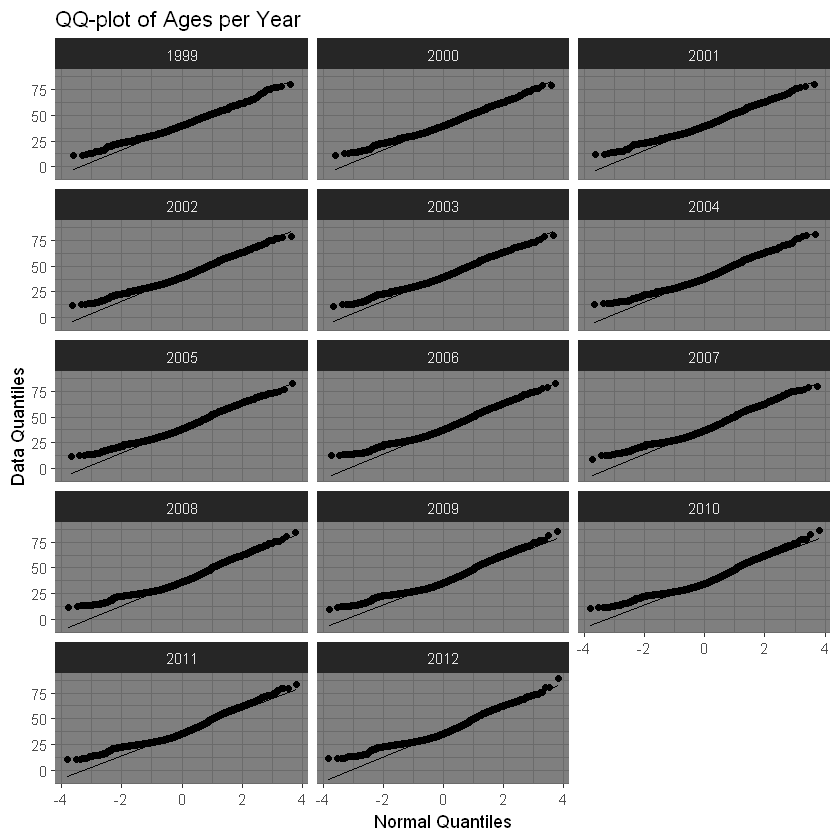

In [30]:
ggplot(data=cbMen, aes(sample=age)) + 
  stat_qq() + 
  stat_qq_line() + 
  theme_dark() +
  facet_wrap(~ year, ncol=3) + 
  labs(title="QQ-plot of Ages per Year", x="Normal Quantiles", y="Data Quantiles")

Figure 1.4: Quantile-Quantile plot of runner's ages for each race year. As with the overall QQ-plot, the data sets are all very normally distrubted except for below the age of about 26.

Using QQ-plots, histograms, and kernel density estimation we see no great departure from normality that the Central Limit Theorem would not correct for so this assumption of normality is met. Because of this we can assume the overall age data is normally distributed, and for each year. 

Moving on to visualize the variance of the data we made histograms for each year.

Warning message:
"Removed 4 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 4 rows containing non-finite values (stat_summary)."

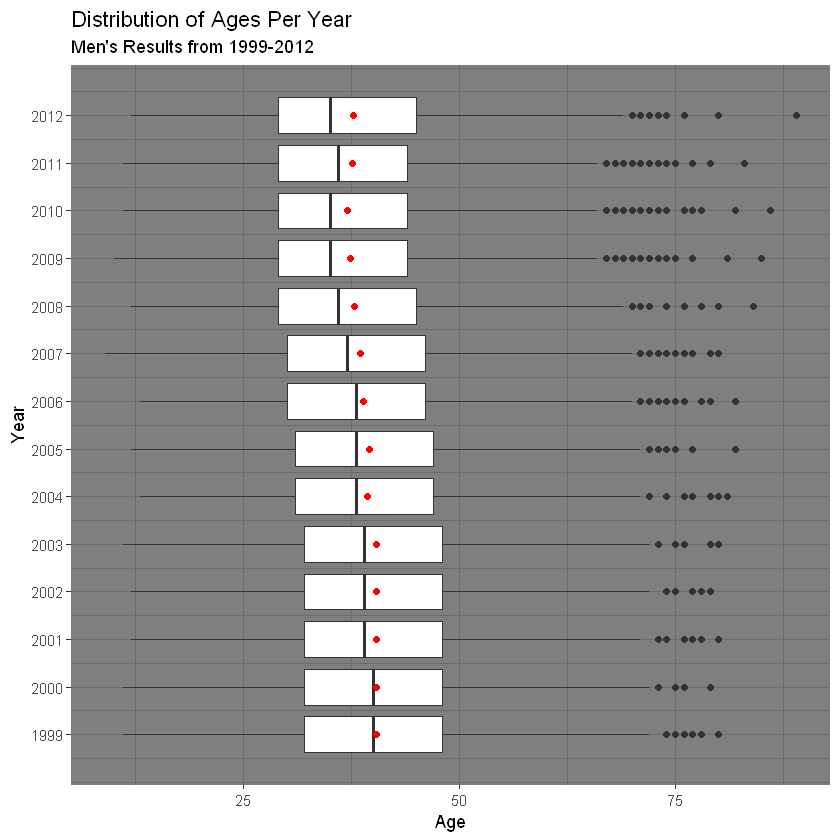

In [31]:
ggplot(data=cbMen, aes(x=year, y=age, group=year)) + 
  geom_boxplot() + 
  coord_flip() + 
  theme_dark() + 
  scale_x_continuous(breaks=seq(1999, 2012, 1)) + 
  stat_summary(fun.y=mean, geom="point", color="red", fill="red") + 
  labs(title="Distribution of Ages Per Year", x="Year", y="Age")

Figure 1.5: Boxplots of runner's age distrubtion per year. Noted observations are the high end of the 4th quartile decreasing for nearly every year except for 2012. Q1-Q3 is approximately equal for all years. The median age can be seen decreasing from 40 years old by one year in 2001, 2004, 2007, and fluctuating between age 36 and 35 in 2008-2012. The mean follows a similar trend.

We can see that the variance per year is approximately equal even though Welch's t-test would still account for this assumption being broken. However, since the sample sizes per year have more than doubled from 1999 to 2012 so an unequal variance would have been worrisome for accurate confidence intervals in our t-test results.

Now that all of our assumptions of normally distrubted data, variance, and independence have been met we can continue on with our statistical comparisons between the age of runners per year.

## Results

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1 rows containing non-finite values (stat_summary)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

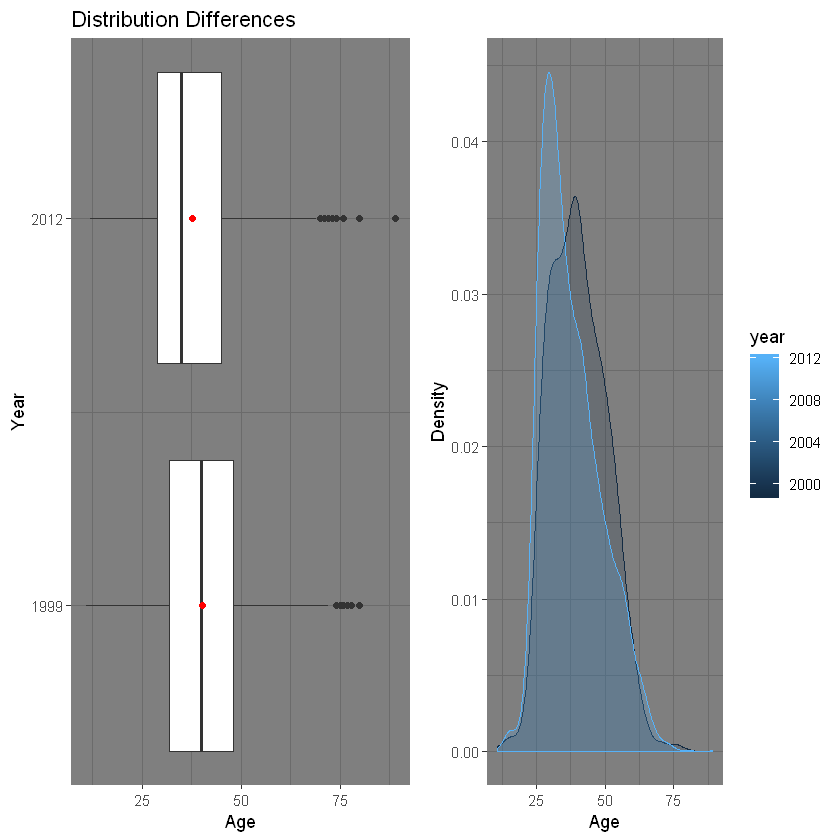

In [9]:
grid.arrange(box.1999.2012, kde.1999.2012, nrow=1)

Figure 1.6: Visualizing the age distribution differences between 1999 and 2012 (our oldest and newest race year data). The biggest difference between the two are a mode of 39 in 1999 and a mode of 29 in 2012. The median decreased by 5 years and mean by 2.58 years.

In [34]:
t.test(x=cbMen$age[cbMen$year == '1999'], y=cbMen$age[cbMen$year == '2012'], mu=0, paired=FALSE, var.equal=FALSE)


	Welch Two Sample t-test

data:  cbMen$age[cbMen$year == "1999"] and cbMen$age[cbMen$year == "2012"]
t = 11.619, df = 6435.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.148712 3.020964
sample estimates:
mean of x mean of y 
 40.33772  37.75289 


Looking at the first and last years of the data recorded there is an overwhelming statistically significant difference (p-value < 2.2e-16) in mean age between the two year's racers. We come to this conclusion with a 95% confidence interval of the difference in mean ages between the two groups being between 2.15 and 3.02 years. We utilized Welch's t-test (assuming unequal variance between the two groups) even though the standard deviations are very similar because Welch's has virtually the same power as a normal t-test but allows the equal variance assumption to be broken. 

Now that we've established that the trend of younger racers over the years has resulted in a statistically signifcant difference between the years 1999 and 2012, we wanted to see if there were any other differences to be found between any other years. To do this we can plot the 95% confidence intervals for each year to visualize which years would be statistically significant from one another. This is possible because if two confidence intervals do not overlap, their difference must be statistically significant.

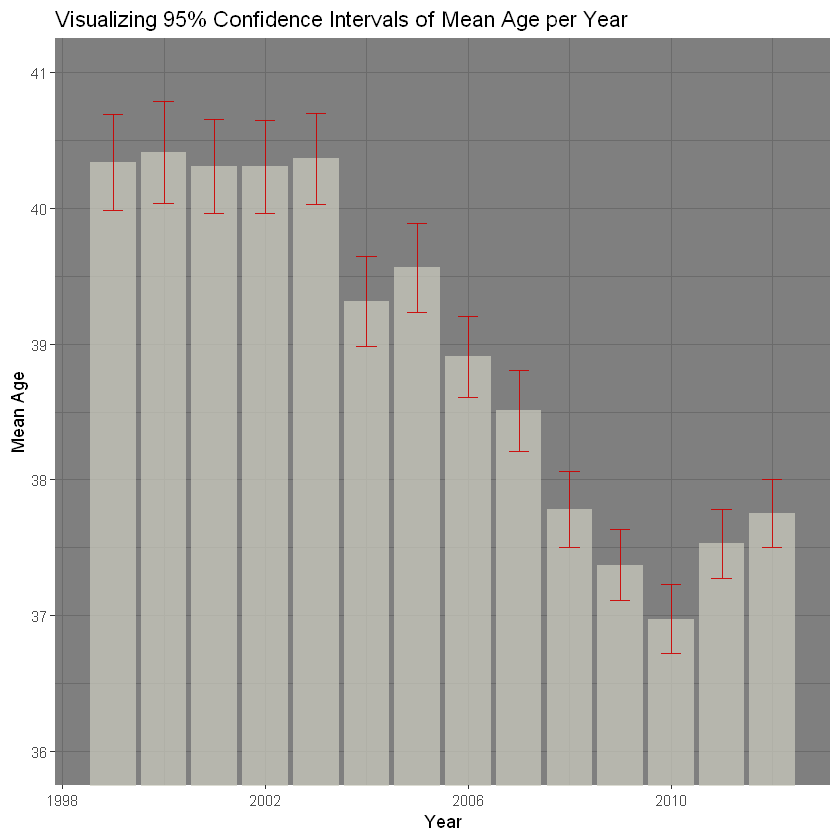

In [10]:
ggplot(data=my_sum) + 
  geom_bar(aes(x=year, y=mean), stat="identity", fill="ivory3", alpha=0.7) + 
  geom_errorbar( aes(x=year, ymin=mean-ic, ymax=mean+ic), width=0.4, colour="red3", alpha=0.9) +
  theme_dark() + 
  labs(title="Visualizing 95% Confidence Intervals of Mean Age per Year", x="Year", y="Mean Age") + 
  coord_cartesian(ylim=c(36,41))

Figure 1.7: Visualizing statistical differences in mean age per year. This allows us to easily see which years are statistically different from one another without having to run two sample t-tests on all combination of years. The only subsequent years that are statistically different are between 2003 and 2004, 2005 and 2006, 2007 and 2008, and 2010 and 2011 (all p-values less than 0.004).

Other close statistically significant differences are between 2001 and 2005, and 2004 and 2007. All other statistically significant differences can be easily seen where the confidence intervals do not overlap.

## Discussion

The main question that was to be addressed was how did the age distribution of male runners in the Cherry Blossom 10 Mile Race change from 1999 to 2012 and if it did change, was it gradual. From our basic summary statistics and a two sample t-test between 1999 and 2012 ages we confirmed there was a statistically significant difference. Then using Figure 1.7 we can tell which years were statistically different from one another. From 1999 to 2003 there was virtually no change in the mean age between the runners, then a gradual decrease in age per year occured until it rose in 2011 and 2012. Although many of these years have a statistical difference between the year prior or two years prior they are questionably practically significant. The most practically significant results would have to come from any year between 1999 and 2003 (mean of approximately 40.34 years old) when compared to 2010 (mean of 37.75 years old). The cause of this mean difference of about 2.6 years of the runners would have to be examined further with the race coordinators. Further analysis would be needed for the women's runners as well to see if a similar trend is followed.

### Sources

- Nolan, Debra. "Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving."
- https://stackoverflow.com/questions/4227223/r-list-to-data-frame
- http://www.cherryblossom.org/
- http://rdatasciencecases.org/
- https://www.rdocumentation.org/

In [5]:
# Set working directory
#fileLoc <- "C:\\Users\\Brett\\OneDrive - Southern Methodist University\\Semester 5\\QtW\\CaseStudy2"
#fileLoc <- "C:\\Users\\Clovis\\Desktop\\School\\SMU Data Science\\2019 Spring\\Quantifying The World\\Unit 4 - LOESS\\Case Study Unit 4"
#setwd(fileLoc)

# Libraries
library(XML)
library(data.table)
library(ggplot2)
library(gridExtra)
library(dplyr)

# Globals
shortColNames = c("name", "home", "ag", "gun", "net", "time")

# Functions
findColLocs = function(spacerRow) {
  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)
  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

selectCols =
  function(colNames, headerRow, searchLocs)
  {
    sapply(colNames,
           function(name, headerRow, searchLocs)
           {
             startPos = regexpr(name, headerRow)[[1]]
             if (startPos == -1)
               return( c(NA, NA) )
             index = sum(startPos >= searchLocs)
             c(searchLocs[index] + 1, searchLocs[index + 1])
           },
           headerRow = headerRow, searchLocs = searchLocs )
  }

convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
    if (length(x) == 2) x[1] + x[2]/60
    else 60*x[1] + x[2] + x[3]/60
  })
}

extractVariables <-
  function(file, varNames = shortColNames) {
    # Find the index of the row with =s
    eqIndex = grep("^===", file)
    
    # Extract the two key rows and the data 
    spacerRow = file[eqIndex] 
    headerRow = tolower(file[ eqIndex - 1 ])
    body = file[ -(1 : eqIndex) ]
    
    
    # Remove footnotes and blank rows
    footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
    if ( length(footnotes) > 0 ) body = body[ -footnotes ]
    blanks = grep("^[[:blank:]]*$", body)
    if (length(blanks) > 0 ) body = body[ -blanks ]
    
    
    # Obtain the starting and ending positions of variables   
    searchLocs = findColLocs(spacerRow)
    locCols = selectCols(varNames, headerRow, searchLocs)
    
    
    Values = mapply(substr, list(body), start = locCols[1, ], 
                    stop = locCols[2, ])
    colnames(Values) = varNames
    
    return(Values)
  }

extractResTable =
  # takes a list of websites from the cherry blossom race
  # a list of years corresponding to the year the result is for
  # and the gender of the participant
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  # returns a list of strings corrsponding to lines in the web url
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    doc = htmlParse(url, encoding = "UTF-8")
    
    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
      els = gsub("Â", " ", els)
    }
    else if (year == 1999) {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]]   
    } 
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }

createDF = function(Res, year, sex) 
{
  if (year == "2006") {
    print("Examine string")
  }
  
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

# Base domain name
ubase <- "http://www.cherryblossom.org/results/"

# Individual page sites
pages <- c("1999/cb99m.html", 
           "2000/Cb003m.htm",
           "2001/oof_m.html",
           "2002/oofm.htm",
           "2003/CB03-M.HTM",
           "2004/men.htm",
           "2005/CB05-M.htm",
           "2006/mennet.htm",
           "2007/men.htm",
           "2008/men.htm",
           "2009/09cucb-M.htm",
           "2010/2010cucb10m-m.htm",
           "2011/2011cucb10m-m.htm",
           "2012/2012cucb10m-m.htm")

# Combine base and individual to get full url
urls <- paste(ubase, pages, sep = "")

# Pull each year into a dataframe and combine
years = 1999:2012
menFiles = mapply(extractResTable, url = urls, year = years)
names(menFiles) = years

# 2006 Data columns for home and time aren't split and regex extracts data incorrectly
separatorIdx = grep("^===", menFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
menFiles[['2006']][separatorIdx] = separatorRowX

# Extract data from each file for each record
menResMat = lapply(menFiles, extractVariables)
menDF = mapply(createDF, menResMat, year = 1999:2012, sex = rep("M", 14), SIMPLIFY = FALSE)

# Combine all results into one variable
cbMen <- do.call(rbind, menDF)

# Look at the records that don't have an age value
namesNA <- cbMen[is.na(cbMen$age), "name"]

# Trim whitespaces
namesNA <- sapply(namesNA, function(x) trimws(x))

# Split first and last name
lastName <- sapply(namesNA, function(x) strsplit(x, " "))

# Determine indices for each name
tmpResult <- lapply(lastName, function(x) grep(x[2], cbMen$name, ignore.case = TRUE))

# Credit: https://stackoverflow.com/questions/4227223/r-list-to-data-frame
df <- data.frame(matrix(tmpResult))

row.names(df) <- namesNA
colnames(df) <- "Index Location"

matches <- lapply(namesNA, function(x) grep(x, cbMen$name, ignore.case = TRUE))

# Use the data from previous years to try to fill in the missing age information
# Age extrapolated from other year entries
tmpIdx <- grep("rob faye", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen[1083, "age"] <- 33

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("dave boyer", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# Age extrapolated from other year entries
tmpIdx <- grep("john marquart", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen[21858, "age"] <- 48

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("runner dx", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("runner cb", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# Age extrapolated from other year entries
tmpIdx <- grep("joseph Ferguson", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen[23380, "age"] <- 40

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("runner bc", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("ronald henry", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("unidentified runner", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("runner cf", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("runner ch", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# Age extrapolated from other year entries
tmpIdx <- grep("william brooks", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen[30589, "age"] <- 54

# Age extrapolated from other year entries
tmpIdx <- grep("jim catella", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen[31357, "age"] <- 26

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("monty hoffman", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("unknown", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# Two entries in the same year, different times, no home, remove NA
tmpIdx <- grep("jonathan phillips", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-42979, ]

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("ngata nganga", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# Two entries, same year, different homes, remove NA
tmpIdx <- grep("dan kahn", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-48970, ]

# Age extrapolated from other year entries
tmpIdx <- grep("bart forsyth", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen[49272, "age"] <- 32

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("aaron griggs", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove NA
tmpIdx <- grep("mike hutchinson", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove entry
tmpIdx <- grep("joseph white", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-70053, ]

# Age extrapolated from other year entries
tmpIdx <- grep("Steve Pinkos", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen[7582, "age"] <- 31

# Age extrapolated from other year entries
tmpIdx <- grep("Jeff Lake", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen[9208, "age"] <- 39

# No other entries, can't extrapolate age, remove entry
tmpIdx <- grep("greg Rhode", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# Age extrapolated from other year entries
tmpIdx <- grep("Arlon Wilber", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen[11928, "age"] <- 29

# No other entries, can't extrapolate age, remove entry
tmpIdx <- grep("nicholas rugh", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove entry
tmpIdx <- grep("john riedel", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# No other entries, can't extrapolate age, remove entry
tmpIdx <- grep("robert anderson", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-15861, ]

# No other entries, can't extrapolate age, remove entry
tmpIdx <- grep("jake ravitch", cbMen$name, ignore.case = TRUE)
cbMen[tmpIdx, ]
cbMen <- cbMen[-tmpIdx, ]

# A net time of 1 hour 30 minutes was calculated erroneosly to 1.5 minutes, fixed
summary(cbMen$runTime)
which(cbMen$runTime <= 30)

# Only one entry found, otherwise this would change multiple rows and potentially dangerous code
cbMen[which(cbMen$runTime <= 30), "runTime"] <- 90

save(cbMen, file = "cbMen.rda")

#mode function
mode = function(x){ 
    ta = table(x)
    tam = max(ta)
    if (all(ta == tam))
         mod = NA
    else
         if(is.numeric(x))
    mod = as.numeric(names(ta)[ta == tam])
    else
         mod = names(ta)[ta == tam]
    return(mod)
}

# the summary code adapted from https://www.r-graph-gallery.com/4-barplot-with-error-bar/
# Calculates mean, sd, se and IC
my_sum <- cbMen %>%
  group_by(year) %>%
  summarise( 
    n=n(),
    mean=mean(age, na.rm=TRUE),
    sd=sd(age, na.rm=TRUE)
  ) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))

tenKdata <- cbMen

[1] "Examine string"


Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"

,year,sex,name,home,age,runTime
1999.1083,1999,M,Rob Faye,Vienna VA,NA,78.25000
2000.1257,2000,M,Rob Faye,Vienna VA,34,81.53333
2001.2881,2001,M,Rob FAYE,Mclean VA,36,91.56667


,year,sex,name,home,age,runTime
2002.2491,2002,M,Dave BOYER,Washington DC,NA,91.31667


,year,sex,name,home,age,runTime
2003.586,2003,M,John Marquart,Madison WI,46,69.60000
2005.267,2005,M,John Marquart,Madison WI,NA,66.01667


,year,sex,name,home,age,runTime
2005.542,2005,M,Runner Dx Iii X Viii,Rockville MD,NA,69.76667


,year,sex,name,home,age,runTime
2005.925,2005,M,Runner Cb Vii Ix V,Rockville MD,NA,77.55


,year,sex,name,home,age,runTime
2004.3193,2004,M,Joseph Ferguson,Richmond VA,39,94.28333
2005.1791,2005,M,Joseph Ferguson,Richmond VA,NA,86.68333


,year,sex,name,home,age,runTime
2005.2129,2005,M,Runner Bc Iii Ii O,Rockville MD,NA,87


,year,sex,name,home,age,runTime
2005.3464,2005,M,Ronald Henry,Arlington VA,NA,97.16667


,year,sex,name,home,age,runTime
2005.3874,2005,M,Unidentified Runner Xx,Rockville MD,NA,103.75


,year,sex,name,home,age,runTime
2005.3893,2005,M,Runner Cf Vii Iii Iv,Rockville MD,NA,112.6167


,year,sex,name,home,age,runTime
2005.4200,2005,M,Runner Ch Iii Viii Iii,Rockville MD,NA,116.3833


,year,sex,name,home,age,runTime
1999.2607,1999,M,William Brooks,Rockville MD,47,95.93333
2000.2120,2000,M,William Brooks,Rockville MD,48,91.16667
2001.2512,2001,M,William BROOKS,Rockville MD,49,89.90000
2002.1892,2002,M,William BROOKS,Rockville MD,50,87.38333
2003.2695,2003,M,William Brooks,Rockville MD,51,95.23333
2004.2665,2004,M,William Brooks,Rockville MD,52,94.93333
2006.4681,2006,M,William Brooks,Rehoboth Beach,NA,106.81667
2007.4367,2007,M,William Brooks,Rehoboth Beach DE,55,100.86667
2009.6093,2009,M,William Brooks,Rehoboth Beach DE,57,109.95000


,year,sex,name,home,age,runTime
2007.213,2007,M,Jim Catella,Washington DC,NA,64.18333
2008.386,2008,M,Jim Catella,Washington DC,27,67.23333


,year,sex,name,home,age,runTime
2007.2657,2007,M,Monty Hoffman,Potomac MD,NA,86.33333


,year,sex,name,home,age,runTime
1999.680,1999,M,Unknown Runner,Rockville MD,25,73.20000
2006.92,2006,M,Unknown Male,Washington,27,59.36667
2006.2187,2006,M,Unknown Runner,Rockville,58,84.55000
2007.2904,2007,M,Unknown,,NA,87.86667
2010.4302,2010,M,Unknown,,38,92.65000


,year,sex,name,home,age,runTime
2008.847,2008,M,Jonathan Phillips,Washington DC,27,72.65000
2009.683,2009,M,Jonathan Phillips,,NA,70.36667
2009.2987,2009,M,Jonathan Phillips,Washington DC,28,85.68333
2010.2937,2010,M,Jonathan Phillips,Washington DC,29,85.06667
2011.944,2011,M,Jonathan Phillips,Washington DC,30,73.15000
2012.1089,2012,M,Jonathan Phillips,Washington DC,31,72.71667
2012.3270,2012,M,Jonathan Phillips,Washington DC,31,85.75000


,year,sex,name,home,age,runTime
2009.6574,2009,M,Ngata Nganga,,NA,128.3667


,year,sex,name,home,age,runTime
2008.484,2008,M,Dan Kahn,Gaithersburg MD,42,68.73333
2009.626,2009,M,Dan Kahn,Gaithersburg MD,43,69.76667
2010.27,2010,M,Dan Kahn,Houston TX,NA,52.60000
2010.431,2010,M,Dan Kahn,Gaithersburg MD,44,67.28333


,year,sex,name,home,age,runTime
2005.134,2005,M,Bart Forsyth,Arlington VA,27,61.41667
2006.104,2006,M,Bart Forsyth,Arlington,28,59.86667
2009.117,2009,M,Bart Forsyth,Arlington VA,31,59.75000
2010.329,2010,M,Bart Forsyth,Arlington VA,NA,65.45000
2011.112,2011,M,Bart Forsyth,Arlington VA,33,59.65000
2012.113,2012,M,Bart Forsyth,Arlington VA,34,59.16667


,year,sex,name,home,age,runTime
2010.1180,2010,M,Aaron Griggs,,NA,74.98333


,year,sex,name,home,age,runTime
2010.5741,2010,M,Mike Hutchinson,Washibgton DC,NA,104.0833


,year,sex,name,home,age,runTime
1999.1668,1999,M,Joseph White,Bethesda MD,60,84.91667
2000.1450,2000,M,Joseph White,Bethesda MD,61,83.68333
2001.1565,2001,M,Joseph WHITE,Bethesda MD,62,83.71667
2002.2503,2002,M,Joseph WHITE,Bethesda MD,63,88.46667
2003.2291,2003,M,Joseph White,Bethesda MD,64,88.45000
2004.1979,2004,M,Joseph White,Bethesda MD,65,86.76667
2005.2312,2005,M,Joseph White,Bethesda MD,66,92.25000
2006.3440,2006,M,Joseph White,Bethesda,67,93.21667
2008.5264,2008,M,Joseph White,Bethesda MD,69,106.88333
2009.4944,2009,M,Joseph White,Bethesda MD,70,97.46667


,year,sex,name,home,age,runTime
2000.1641,2000,M,Steve Pinkos,Washington DC,30,85.08333
2001.1377,2001,M,Steve PINKOS,Washington DC,0,80.11667


,year,sex,name,home,age,runTime
2001.3003,2001,M,Jeff LAKE,Clarksville MD,0,99.43333
2002.2814,2002,M,Jeff LAKE,Clarksville MD,40,93.61667
2003.2874,2003,M,Jeff Lake,Clarksville MD,41,94.23333
2006.4516,2006,M,Jeff Lake,Clarksville,44,103.81667


,year,sex,name,home,age,runTime
2001.3052,2001,M,Greg RHODE,Washington DC,0,97.23333


,year,sex,name,home,age,runTime
2002.2163,2002,M,Arlon WILBER,Durham NC,4,88.93333
2003.2400,2003,M,Arlon Wilber,Dubham NC,30,89.20000
2005.1970,2005,M,Arlon Wilber,Durham NC,32,87.91667
2008.2962,2008,M,Arlon Wilber,Durham NC,35,87.56667
2011.3640,2011,M,Arlon Wilber,Durham NC,38,89.13333
2012.4504,2012,M,Arlon Wilber,Durham NC,39,92.31667


,year,sex,name,home,age,runTime
2002.3282,2002,M,Nicholas RUGH,Arlington VA,1,103.75


,year,sex,name,home,age,runTime
2003.1337,2003,M,John Riedel,Annapolis MD,2,79.35


,year,sex,name,home,age,runTime
1999.1667,1999,M,Robert Anderson,Columbia MD,45,84.91667
1999.1884,1999,M,Robert Anderson,Centreville VA,52,87.00000
2003.2376,2003,M,Robert Anderson,Washington DC,0,88.80000
2004.3078,2004,M,Robert Anderson,Charlottesville VA,29,96.40000
2009.2059,2009,M,Robert Anderson,Richmond KY,44,80.45000


,year,sex,name,home,age,runTime
2011.5669,2011,M,Jake Ravitch,Bethesda MD,8,102.5
2012.5221,2012,M,Jake Ravitch,Bethesda MD,9,96.6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.50   77.23   86.53   87.48   96.60  175.60 

[1] 8455

Warning message:
"package 'bindrcpp' was built under R version 3.5.2"

In [7]:
#KDE total distrubtion
kde.plot <- ggplot(data=cbMen, aes(age)) +
              geom_density(alpha = 0.4, fill="dodgerblue2") +
              theme(legend.position = "none") +
              theme_dark() +
              labs(title="Distribution of Ages Over All Years", subtitle="Kernel Density Estimate", x="Age", y="Density")

#histogram total distrubtion
histo.plot <- ggplot(data=cbMen, aes(x=age, colour=year, fill=year, group=year)) + 
                geom_histogram() +
                theme_dark() +
                labs(title=" ", subtitle="Histogram", x="Age", y="Count")

In [8]:
cbMen.1999.2012.only <- subset(cbMen, year==1999 | year==2012)

box.1999.2012 <- ggplot(data=cbMen.1999.2012.only, aes(x=year, y=age, group=year)) + 
                    geom_boxplot() + 
                    coord_flip() + 
                    theme_dark() + 
                    scale_x_continuous(breaks=seq(1999, 2012, 13)) + 
                    stat_summary(fun.y=mean, geom="point", color="red", fill="red") + 
                    labs(title="Distribution Differences", x="Year", y="Age")

kde.1999.2012 <- ggplot(data=cbMen.1999.2012.only, aes(age, group=year, fill=year, colour=year)) +
                    geom_density(alpha = 0.2) +
                    theme_dark() +
                    labs(title=" ", x="Age", y="Density")